# Classification

## Classifying Popularity Based on Audio Features and Genre

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, RandomForestRegressor, ExtraTreesRegressor, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import timeit

In [56]:
df = pd.read_csv('./data/dummified_genres.csv')
df

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre_southern rock.1,genre_symphonic rock.5,genre_vapor soul.3,genre_roots rock.9,genre_soft rock.10,genre_symphonic rock.6,genre_southern rock.2,genre_symphonic rock.7,genre_zolo.4,genre_swamp rock.1
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,...,0,0,0,0,0,0,0,0,0,0
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,...,0,0,0,0,0,0,0,0,0,0
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,...,0,0,0,0,0,0,0,0,0,0
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,...,0,0,0,0,0,0,0,0,0,0
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Time Shard,Cosmic Carrot - 2022 Remaster,49u25ckAvC2vLaOFAKON5w,0,0.318,0.295,0,-16.727,1,0.0319,...,0,0,0,0,0,0,0,0,0,0
10060,Eminem,Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,...,0,0,0,0,0,0,0,0,0,0
10061,Eliseu Carvalho,Krafty Days 2022,18IzyQBkLl4qMZj7Pkm4u3,0,0.807,0.580,1,-12.847,1,0.0856,...,0,0,0,0,0,0,0,0,0,0
10062,Dustin Lynch,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,...,0,0,0,0,0,0,0,0,0,0


In [57]:
dict_map = {range(0,46) : 0, range(46,100) : 1}
df['popularity_mapped'] = df['popularity'].apply(lambda x: next((v for k, v in dict_map.items() if x in k), 0))
df

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,...,genre_symphonic rock.5,genre_vapor soul.3,genre_roots rock.9,genre_soft rock.10,genre_symphonic rock.6,genre_southern rock.2,genre_symphonic rock.7,genre_zolo.4,genre_swamp rock.1,popularity_mapped
0,Frank Ocean,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,...,0,0,0,0,0,0,0,0,0,1
1,David Bowie,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,...,0,0,0,0,0,0,0,0,0,1
2,Kendrick Lamar,Money Trees,2HbKqm4o0w5wEeEFXm2sD4,79,0.716,0.531,7,-7.355,1,0.1220,...,0,0,0,0,0,0,0,0,0,1
3,Electro Dark Project,Year 2012,6AXz0oyVU4oXh9Tb98TXMd,0,0.501,0.687,0,-4.657,1,0.0494,...,0,0,0,0,0,0,0,0,0,0
4,Chief Keef,Love Sosa,01Lr5YepbgjXAWR9iOEyH1,80,0.772,0.413,0,-8.193,0,0.0890,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10059,Time Shard,Cosmic Carrot - 2022 Remaster,49u25ckAvC2vLaOFAKON5w,0,0.318,0.295,0,-16.727,1,0.0319,...,0,0,0,0,0,0,0,0,0,0
10060,Eminem,Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,...,0,0,0,0,0,0,0,0,0,1
10061,Eliseu Carvalho,Krafty Days 2022,18IzyQBkLl4qMZj7Pkm4u3,0,0.807,0.580,1,-12.847,1,0.0856,...,0,0,0,0,0,0,0,0,0,0
10062,Dustin Lynch,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,...,0,0,0,0,0,0,0,0,0,1


In [58]:
X = df.drop(columns = ['artist_name', 'track_name', 'track_id', 'popularity', 'popularity_mapped'])
y = df['popularity_mapped']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [68]:
logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

print(f'Train: {logreg.score(X_train, y_train)}')
print(f'Test: {logreg.score(X_test, y_test)}')

Train: 0.5373608903020668
Test: 0.537758346581876


In [69]:
predslog = logreg.predict(X_test)

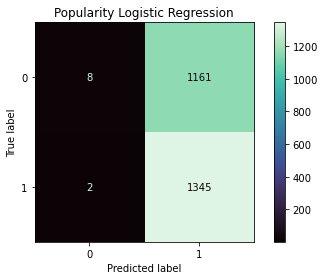

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test, predslog, 
                                        cmap = 'mako')
plt.title('Popularity Logistic Regression')

plt.tight_layout()
plt.savefig('./images/logreg_simple_cmatrix');

In [71]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

Train: 0.9980127186009539
Test: 0.8998410174880763


In [72]:
predsrf = rf.predict(X_test)

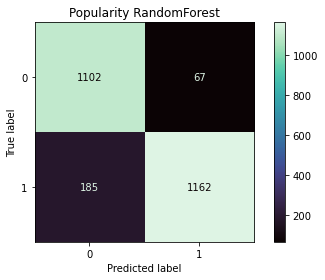

In [73]:
ConfusionMatrixDisplay.from_predictions(y_test, predsrf, 
                                        cmap = 'mako')
plt.title('Popularity RandomForest')

plt.tight_layout()
plt.savefig('./images/rf_simple_cmatrix');

In [74]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

print(f'Train: {ada.score(X_train, y_train)}')
print(f'Test: {ada.score(X_test, y_test)}')

Train: 0.848966613672496
Test: 0.8334658187599364


In [75]:
predsada = ada.predict(X_test)

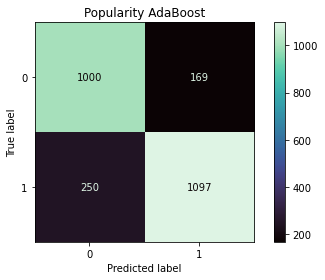

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, predsada, 
                                        cmap = 'mako')
plt.title('Popularity AdaBoost')

plt.tight_layout()
plt.savefig('./images/ada_simple_cmatrix');

In [77]:
gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

print(f'Train: {gr.score(X_train, y_train)}')
print(f'Test: {gr.score(X_test, y_test)}')

Train: 0.8502914679385267
Test: 0.8445945945945946


In [78]:
predsgr = gr.predict(X_test)

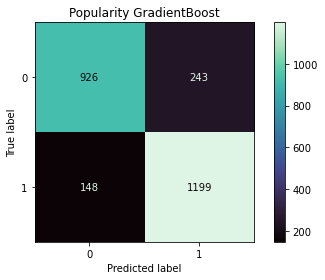

In [79]:
ConfusionMatrixDisplay.from_predictions(y_test, predsgr, 
                                        cmap = 'mako')
plt.title('Popularity GradientBoost')

plt.tight_layout()
plt.savefig('./images/gr_simple_cmatrix');

## Classifying Genre Based on Audio Features

In [84]:
df2 = pd.read_csv('./data/artist_genre.csv')
df2

,artist_name,genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
1,Frank Ocean,lgbtq+ hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
2,Frank Ocean,neo soul,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
3,Frank Ocean,pop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.027200,0.000503,0.1670,0.497,123.061,234093,4
4,David Bowie,art rock,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.142000,0.000010,0.0449,0.321,152.531,283753,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32572,Dustin Lynch,contemporary country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
32573,Dustin Lynch,country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
32574,Dustin Lynch,country road,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4
32575,Dustin Lynch,modern country rock,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.137000,0.000000,0.1090,0.801,203.803,170560,4


In [101]:
df2['genre'].value_counts()

pop                      1733
rap                      1152
dance pop                 858
hip hop                   706
rock                      702
                         ... 
virgin islands reggae       1
chilena                     1
veracruz indie              1
modern big band             1
argentine ambient           1
Name: genre, Length: 1299, dtype: int64

In [99]:
df2['genre'].value_counts().tail(444)

smooth jazz              1
auckland indie           1
drill brasileiro         1
australian trap          1
classic j-pop            1
                        ..
virgin islands reggae    1
chilena                  1
veracruz indie           1
modern big band          1
argentine ambient        1
Name: genre, Length: 444, dtype: int64

In [7]:
df2.isnull().sum()

artist_name            0
genre               1703
track_name             0
track_id               0
popularity             0
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
duration_ms            0
time_signature         0
dtype: int64

In [8]:
df2.dropna(inplace = True)

In [9]:
print(df.shape)
df2.isnull().sum()

(10064, 2589)


artist_name         0
genre               0
track_name          0
track_id            0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [10]:
df2

,artist_name,genre,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Frank Ocean,hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
1,Frank Ocean,lgbtq+ hip hop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
2,Frank Ocean,neo soul,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
3,Frank Ocean,pop,Lost,3GZD6HmiNUhxXYf8Gch723,85,0.913,0.603,8,-4.892,1,0.2260,0.02720,0.000503,0.1670,0.497,123.061,234093,4
4,David Bowie,art rock,Five Years - 2012 Remaster,1JIzFhI9Lt5FyslawmHCBi,59,0.460,0.326,7,-10.699,1,0.0417,0.14200,0.000010,0.0449,0.321,152.531,283753,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32570,Eminem,rap,Darkness,48aI5wAluvSrq55EAR329i,53,0.608,0.623,2,-7.239,1,0.3070,0.00833,0.000039,0.6020,0.171,74.344,338493,4
32572,Dustin Lynch,contemporary country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.13700,0.000000,0.1090,0.801,203.803,170560,4
32573,Dustin Lynch,country,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.13700,0.000000,0.1090,0.801,203.803,170560,4
32574,Dustin Lynch,country road,Thinking 'Bout You (feat. MacKenzie Porter),4wBjKhJx6JnGoNJfJs24pd,71,0.403,0.711,8,-4.189,1,0.0569,0.13700,0.000000,0.1090,0.801,203.803,170560,4


In [82]:
X = df2.drop(columns = ['genre', 'artist_name', 'track_name', 'track_id'])
y = df2['genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [62]:
start = timeit.default_timer()

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train, y_train)

print(f'Train: {logreg.score(X_train, y_train)}')
print(f'Test: {logreg.score(X_test, y_test)}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

C:\Users\sbhew\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Train: 0.08244439645864823
Test: 0.0757870190439176
Time to run this code (in seconds): 8975.739348199999


In [63]:
start = timeit.default_timer()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print(f'Train: {rf.score(X_train, y_train)}')
print(f'Test: {rf.score(X_test, y_test)}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Train: 0.34156769596199527
Test: 0.022541780023319084
Time to run this code (in seconds): 61.71685760000037


In [49]:
print('start')
start = timeit.default_timer()

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

print(f'Train: {ada.score(X_train, y_train)}')
print(f'Test: {ada.score(X_test, y_test)}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

start
Train: 0.07229540056143381
Test: 0.06749578961005312
Time to run this code (in seconds): 79.15020949999962


In [83]:
print('start')
start = timeit.default_timer()

gr = GradientBoostingClassifier()
gr.fit(X_train, y_train)

print(f'Train: {gr.score(X_train, y_train)}')
print(f'Test: {gr.score(X_test, y_test)}')

stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

start


KeyboardInterrupt: 